In [1]:
%matplotlib notebook
import importlib
from matplotlib import pyplot as plt
from input_encoding.population_coding.utils import gaussian, gen_population_coding
import lvq.lvq1
from lvq.lvq1 import LVQ1
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from som import SOM


In [20]:
importlib.reload(lvq.lvq1)
from lvq.lvq1 import LVQ1


In [3]:
iris = load_iris()
X = iris.data
y = iris.target
n_neuron_per_dim = 20
sigma_ratio = 0.1
X.shape
x_min, x_max = np.min(X, 0), np.max(X, 0)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
# X, X_norm, y = shuffle(X, X_norm, y, random_state=1)

In [21]:
# Create population coding of the Iris data
u_data = np.zeros(shape=X.shape+(n_neuron_per_dim,))
for i in range(X.shape[0]):
    x = X[i,:]
    u_data[i,:,:] = gen_population_coding(x, x_min, x_max, n_neuron_per_dim, sigma_ratio)

u_data_flat = u_data.reshape((u_data.shape[0], u_data.shape[1]*u_data.shape[2] ))
u_data_flat = 200 * u_data_flat
example_protos = u_data_flat[[1,51,101]]
print(u_data_flat)
print(example_protos)

[[ 16.  48. 100. ...   0.   0.   0.]
 [ 50. 104. 166. ...   0.   0.   0.]
 [108. 168. 200. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 118.  60.  22.]
 [  0.   0.   0. ... 196. 190. 142.]
 [  0.   0.   0. ...  36.  12.   2.]]
[[ 50. 104. 166. 200. 182. 126.  66.  26.   8.   2.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   2.   8.  24.  62. 120. 178.
  200. 170. 110.  54.  20.   6.   2.   0.   0.   0.   0.   0. 158. 198.
  186. 134.  72.  30.  10.   2.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0. 184. 198. 164. 102.  48.  18.   4.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   6.  20.  54. 110. 170. 200. 178. 120.
   62.  24.   8.   2.   0.   0.   0.   0.   0.   0.   4.  12.  36.  84.
  146. 194. 194. 146.  84.  36.  12.   4.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   4.  16.  46.  98. 160. 198. 186. 132.  72.  30.
   10.   2.   0.   0.   0.   0.   0.   0.   0.   2.   6.  20.  54. 110.

In [22]:
n_epochs = 100
alpha = 0.02
alpha_decay = 'hill'
init_protos = np.copy(example_protos)
init_protos = np.flip(init_protos, axis=0)
# mlvq1 = LVQ1(bmu_metric='euclidean', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
# mlvq1.train_prototypes(data=X, targets=y, alpha_start=alpha, n_epochs=n_epochs)

mlvq2 = LVQ1(bmu_metric='euclidean', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
mlvq2.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)

mlvq9 = LVQ1(bmu_metric='euclidean', random_protos=False, alpha_decay=alpha_decay,
             init_protos=np.copy(init_protos),
             n_protos_per_class=1, n_class=3)
mlvq9.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)

mlvq10 = LVQ1(bmu_metric='euclidean', random_protos=False, alpha_decay=alpha_decay,
             init_protos=np.copy(example_protos),
             n_protos_per_class=1, n_class=3)
mlvq10.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)

mlvq3 = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
mlvq3.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)

mlvq4 = LVQ1(bmu_metric='dot_product', random_protos=False, alpha_decay=alpha_decay,
             init_protos=np.copy(example_protos),
             n_protos_per_class=1, n_class=3)
mlvq4.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)

mlvq8 = LVQ1(bmu_metric='dot_product', random_protos=False, alpha_decay=alpha_decay,
             init_protos=np.copy(init_protos),
             n_protos_per_class=1, n_class=3)
mlvq8.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)

# mlvq5 = LVQ1(bmu_metric='euclidean', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
# mlvq5.train_prototypes(data=X_norm, targets=y, alpha_start=alpha, n_epochs=n_epochs)

# mlvq6 = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
# mlvq6.train_prototypes(data=X, targets=y, alpha_start=alpha, n_epochs=n_epochs)

# mlvq7 = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
# mlvq7.train_prototypes(data=X_norm, targets=y, alpha_start=alpha, n_epochs=n_epochs)

Initial prototypes:
 [[  60.4   12.6  -18.9   47.6   -0.7  -34.1   39.7  108.4   46.    37.7
   106.8  -35.4   36.5  111.8   61.5   -1.2  -19.1  103.8    5.5   39.1
    21.3   -4.5  -18.5    0.9    9.2  132.2   79.5   99.6  198.5   67.2
   141.4   25.6   38.6   71.6  -66.7   69.7  -26.5   14.6  -11.3   10.2
   252.   128.4   16.8   46.3    5.5   55.    11.7   10.9 -103.3  134.7
   -96.3   52.5  -25.2  104.    51.6   14.9   27.4  -72.2   -1.4   21.9
    17.6  -20.2   79.3   82.8   52.     7.1   -2.4   92.6   36.4   14.4
   109.7  126.9  -26.4  -72.8  163.1  -76.7   -7.7  172.4   87.8   59.7]
 [ 104.7   33.2  -23.5   24.5  -39.2   94.    38.6   -8.9   85.1  115.4
    32.3  166.5  124.8  228.7  -50.7   58.     1.2  -24.4    0.6   31.6
    27.3  -44.8   -2.8   57.8  -11.4  127.8   23.4   52.6   25.4   -5.7
    46.6    6.9  -18.1  166.9   11.5  -15.6  120.5   31.2  -16.3   -5.3
   -29.4   13.4  150.9  -26.7   90.1   26.7   31.2  -17.   148.2   76.5
    25.9  133.3   75.7  158.2  -45.1   -7.

>epoch=4, lrate=0.020, error=103363.704, inf_err=0.333
>epoch=5, lrate=0.020, error=105718.499, inf_err=0.280
>epoch=6, lrate=0.020, error=91381.456, inf_err=0.147
>epoch=7, lrate=0.020, error=68163.543, inf_err=0.047
>epoch=8, lrate=0.020, error=59381.832, inf_err=0.047
>epoch=9, lrate=0.020, error=57567.159, inf_err=0.047
>epoch=10, lrate=0.020, error=57452.861, inf_err=0.047
>epoch=11, lrate=0.020, error=57210.516, inf_err=0.047
>epoch=12, lrate=0.020, error=57177.170, inf_err=0.047
>epoch=13, lrate=0.020, error=57145.539, inf_err=0.047
>epoch=14, lrate=0.020, error=57308.884, inf_err=0.047
>epoch=15, lrate=0.020, error=57189.782, inf_err=0.047
>epoch=16, lrate=0.020, error=57141.913, inf_err=0.047
>epoch=17, lrate=0.020, error=57152.765, inf_err=0.047
>epoch=18, lrate=0.020, error=57161.040, inf_err=0.047
>epoch=19, lrate=0.020, error=57195.474, inf_err=0.047
>epoch=20, lrate=0.019, error=57207.835, inf_err=0.047
>epoch=21, lrate=0.019, error=57210.027, inf_err=0.047
>epoch=22, lra

>epoch=25, lrate=0.019, error=57169.297, inf_err=0.047
>epoch=26, lrate=0.019, error=57242.952, inf_err=0.040
>epoch=27, lrate=0.018, error=57119.070, inf_err=0.047
>epoch=28, lrate=0.018, error=57231.916, inf_err=0.047
>epoch=29, lrate=0.018, error=57057.310, inf_err=0.047
>epoch=30, lrate=0.018, error=57105.607, inf_err=0.040
>epoch=31, lrate=0.017, error=57158.792, inf_err=0.047
>epoch=32, lrate=0.017, error=57223.896, inf_err=0.047
>epoch=33, lrate=0.017, error=57189.835, inf_err=0.047
>epoch=34, lrate=0.016, error=57116.630, inf_err=0.047
>epoch=35, lrate=0.016, error=57184.742, inf_err=0.053
>epoch=36, lrate=0.016, error=57207.501, inf_err=0.040
>epoch=37, lrate=0.015, error=57071.507, inf_err=0.040
>epoch=38, lrate=0.015, error=57067.024, inf_err=0.047
>epoch=39, lrate=0.014, error=57022.722, inf_err=0.047
>epoch=40, lrate=0.014, error=57046.990, inf_err=0.047
>epoch=41, lrate=0.014, error=57077.352, inf_err=0.047
>epoch=42, lrate=0.013, error=57085.624, inf_err=0.053
>epoch=43,

>epoch=16, lrate=0.020, error=57092.981, inf_err=0.047
>epoch=17, lrate=0.020, error=57097.379, inf_err=0.040
>epoch=18, lrate=0.020, error=57196.056, inf_err=0.040
>epoch=19, lrate=0.020, error=57238.022, inf_err=0.047
>epoch=20, lrate=0.019, error=57290.698, inf_err=0.040
>epoch=21, lrate=0.019, error=57048.351, inf_err=0.040
>epoch=22, lrate=0.019, error=57200.763, inf_err=0.040
>epoch=23, lrate=0.019, error=57077.731, inf_err=0.040
>epoch=24, lrate=0.019, error=57160.627, inf_err=0.040
>epoch=25, lrate=0.019, error=57182.822, inf_err=0.040
>epoch=26, lrate=0.019, error=56976.218, inf_err=0.040
>epoch=27, lrate=0.018, error=57189.813, inf_err=0.040
>epoch=28, lrate=0.018, error=57194.009, inf_err=0.040
>epoch=29, lrate=0.018, error=56982.032, inf_err=0.047
>epoch=30, lrate=0.018, error=57138.051, inf_err=0.040
>epoch=31, lrate=0.017, error=57261.617, inf_err=0.047
>epoch=32, lrate=0.017, error=57078.079, inf_err=0.040
>epoch=33, lrate=0.017, error=57082.717, inf_err=0.040
>epoch=34,

>epoch=18, lrate=0.020, error=57171.676, inf_err=0.047
>epoch=19, lrate=0.020, error=57152.146, inf_err=0.047
>epoch=20, lrate=0.019, error=57166.743, inf_err=0.040
>epoch=21, lrate=0.019, error=57218.159, inf_err=0.047
>epoch=22, lrate=0.019, error=57303.578, inf_err=0.047
>epoch=23, lrate=0.019, error=57144.744, inf_err=0.033
>epoch=24, lrate=0.019, error=57046.578, inf_err=0.040
>epoch=25, lrate=0.019, error=57304.887, inf_err=0.047
>epoch=26, lrate=0.019, error=57241.152, inf_err=0.040
>epoch=27, lrate=0.018, error=57090.455, inf_err=0.040
>epoch=28, lrate=0.018, error=57140.035, inf_err=0.040
>epoch=29, lrate=0.018, error=57167.645, inf_err=0.040
>epoch=30, lrate=0.018, error=57174.482, inf_err=0.047
>epoch=31, lrate=0.017, error=56967.926, inf_err=0.040
>epoch=32, lrate=0.017, error=57150.840, inf_err=0.040
>epoch=33, lrate=0.017, error=57173.342, inf_err=0.040
>epoch=34, lrate=0.016, error=57028.544, inf_err=0.040
>epoch=35, lrate=0.016, error=57077.714, inf_err=0.040
>epoch=36,

>epoch=20, lrate=0.019, error=57237.877, inf_err=0.040
>epoch=21, lrate=0.019, error=57152.687, inf_err=0.047
>epoch=22, lrate=0.019, error=57280.891, inf_err=0.047
>epoch=23, lrate=0.019, error=57197.073, inf_err=0.047
>epoch=24, lrate=0.019, error=57088.472, inf_err=0.040
>epoch=25, lrate=0.019, error=57084.213, inf_err=0.040
>epoch=26, lrate=0.019, error=57239.294, inf_err=0.047
>epoch=27, lrate=0.018, error=57259.289, inf_err=0.040
>epoch=28, lrate=0.018, error=57040.882, inf_err=0.047
>epoch=29, lrate=0.018, error=57125.851, inf_err=0.040
>epoch=30, lrate=0.018, error=57102.321, inf_err=0.047
>epoch=31, lrate=0.017, error=57193.557, inf_err=0.040
>epoch=32, lrate=0.017, error=57164.247, inf_err=0.040
>epoch=33, lrate=0.017, error=57172.257, inf_err=0.053
>epoch=34, lrate=0.016, error=57153.984, inf_err=0.040
>epoch=35, lrate=0.016, error=57128.582, inf_err=0.040
>epoch=36, lrate=0.016, error=57017.907, inf_err=0.040
>epoch=37, lrate=0.015, error=57157.786, inf_err=0.047
>epoch=38,

array([[ 54.34,  85.63, 116.57, 138.61, 142.32, 126.11,  97.75,  66.04,
         39.62,  20.42,   9.17,   3.21,   0.88,   0.2 ,   0.04,  -0.  ,
         -0.  ,  -0.  ,  -0.  ,  -0.  ,   1.83,   3.1 ,   4.26,   5.26,
          7.86,  15.25,  29.68,  51.07,  74.35,  94.87, 107.92, 112.25,
        107.07,  93.43,  75.74,  57.24,  40.63,  27.89,  18.32,  11.35,
        144.68, 186.54, 185.61, 143.6 ,  85.48,  39.67,  14.45,   4.13,
          0.68,   0.08,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         -0.  ,  -0.  ,  -0.  ,  -0.  , 160.9 , 183.67, 167.08, 120.38,
         69.62,  33.54,  12.53,   3.6 ,   0.84,   0.16,   0.04,  -0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  -0.  ,  -0.  ,  -0.  ],
       [  1.96,   5.97,  13.66,  26.86,  45.85,  69.91,  94.22, 110.59,
        114.2 , 106.66,  93.76,  79.24,  65.05,  50.2 ,  34.85,  21.16,
         10.76,   4.4 ,   1.45,   0.32,  19.5 ,  33.31,  49.88,  67.64,
         86.49, 105.03, 119.23, 123.61, 112.52,  88.87,  60.99,

<IPython.core.display.Javascript object>


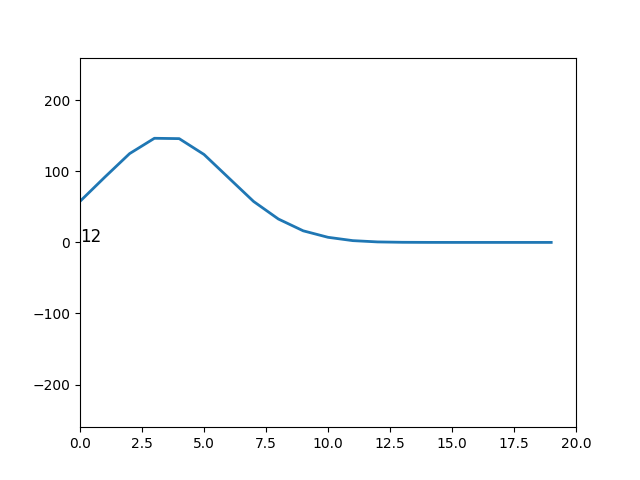

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, n_neuron_per_dim), ylim=(-260, 260))
line, = ax.plot([], [], lw=2)
tex = ax.text(0, 0, "", fontsize=12)
x=np.arange(n_neuron_per_dim)
pt_evolve = mlvq8.proto_evolve[0]


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    tex.set_text("")
    return line,#tex,

# animation function.  This is called sequentially
def animate(i):
    y = pt_evolve[i][1][:n_neuron_per_dim]
    tex.set_text(str(pt_evolve[i][0]))
    line.set_data(x, y)
    return line,#tex,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

plt.show()

<IPython.core.display.Javascript object>


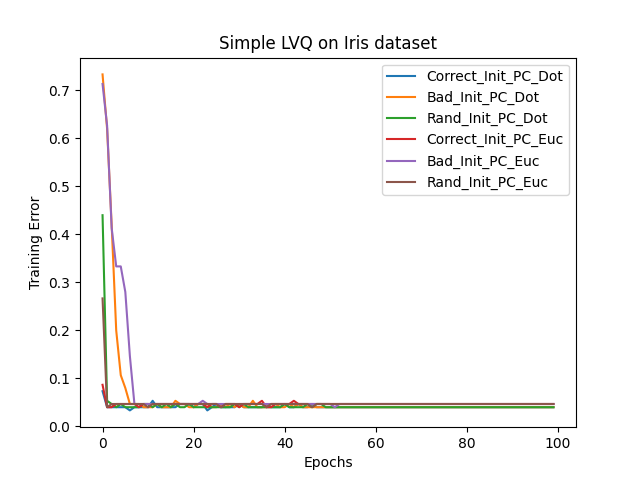

In [23]:
plt.figure()
plt.plot(mlvq4.inf_errors)
plt.plot(mlvq8.inf_errors)
plt.plot(mlvq3.inf_errors)
plt.plot(mlvq10.inf_errors)
plt.plot(mlvq9.inf_errors)
plt.plot(mlvq2.inf_errors)
plt.legend(["Correct_Init_PC_Dot",
            "Bad_Init_PC_Dot",
            "Rand_Init_PC_Dot",
            "Correct_Init_PC_Euc",
            "Bad_Init_PC_Euc",
            "Rand_Init_PC_Euc"])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("Simple LVQ on Iris dataset")

plt.show()

<IPython.core.display.Javascript object>


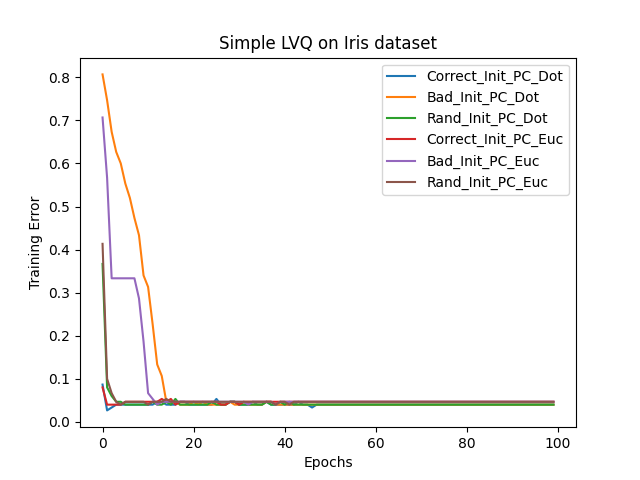

In [86]:
plt.figure()
plt.plot(mlvq4.inf_errors)
plt.plot(mlvq8.inf_errors)
plt.plot(mlvq3.inf_errors)
plt.plot(mlvq10.inf_errors)
plt.plot(mlvq9.inf_errors)
plt.plot(mlvq2.inf_errors)
plt.legend(["Correct_Init_PC_Dot",
            "Bad_Init_PC_Dot",
            "Rand_Init_PC_Dot",
            "Correct_Init_PC_Euc",
            "Bad_Init_PC_Euc",
            "Rand_Init_PC_Euc"])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("Simple LVQ on Iris dataset")

plt.show()

<IPython.core.display.Javascript object>


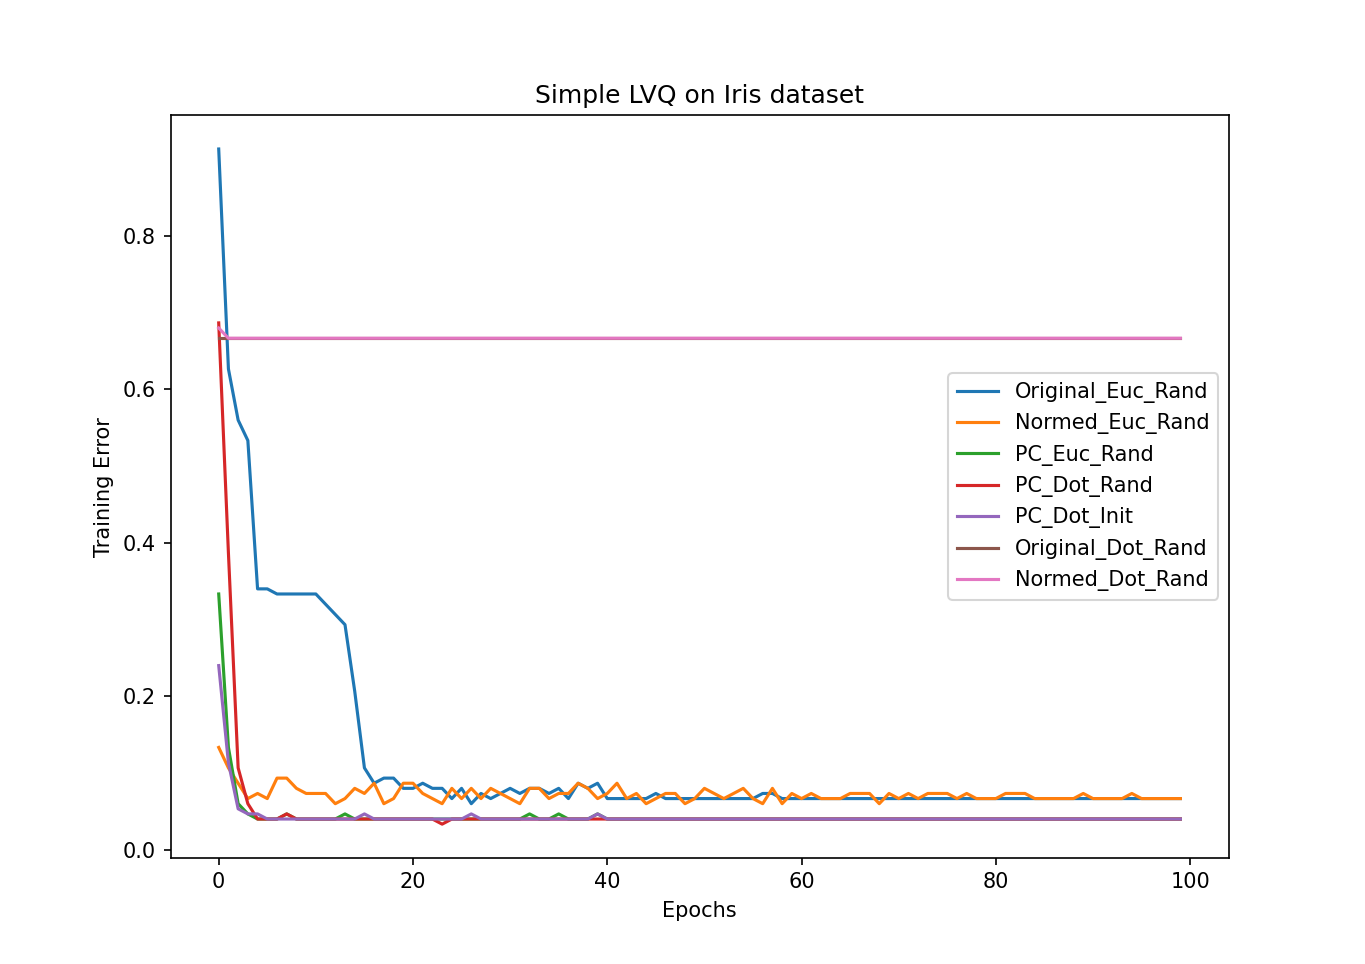

In [21]:
plt.figure()
plt.plot(mlvq1.inf_errors)
plt.plot(mlvq5.inf_errors)
plt.plot(mlvq2.inf_errors)
plt.plot(mlvq3.inf_errors)
plt.plot(mlvq4.inf_errors)
plt.plot(mlvq6.inf_errors)
plt.plot(mlvq7.inf_errors)
plt.legend(["Original_Euc_Rand",
            "Normed_Euc_Rand",
            "PC_Euc_Rand", 
            "PC_Dot_Rand",
            "PC_Dot_Init",
            "Original_Dot_Rand",
            "Normed_Dot_Rand"])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("Simple LVQ on Iris dataset")

plt.show()

<IPython.core.display.Javascript object>


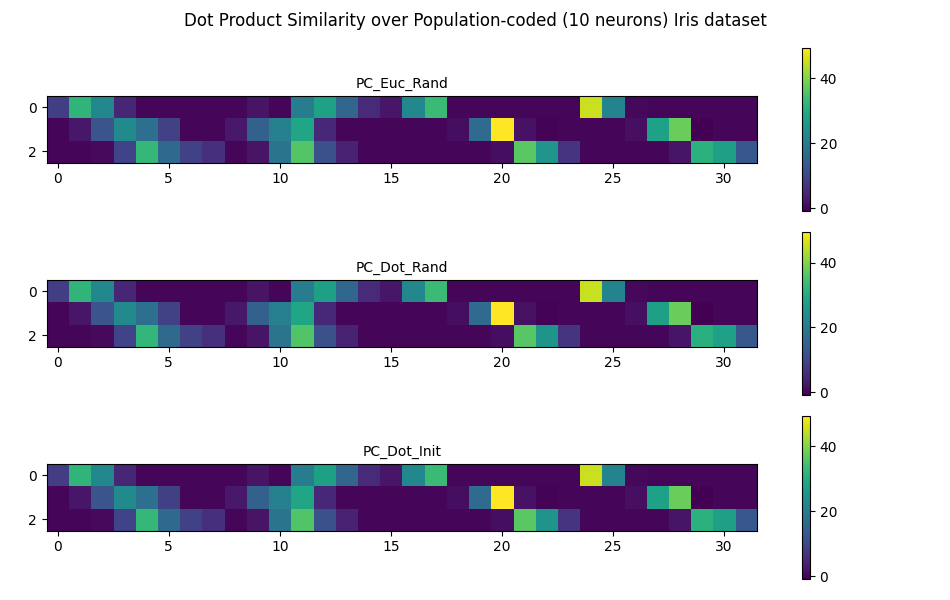

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9.5,6))

im1 = ax1.imshow(mlvq2.prototypes)
im2 = ax2.imshow(mlvq3.prototypes)
im3 = ax3.imshow(mlvq4.prototypes)
ax1.set_title("PC_Euc_Rand", fontsize=10)
ax2.set_title("PC_Dot_Rand", fontsize=10)
ax3.set_title("PC_Dot_Init", fontsize=10)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.suptitle("Dot Product Similarity over Population-coded (10 neurons) Iris dataset")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


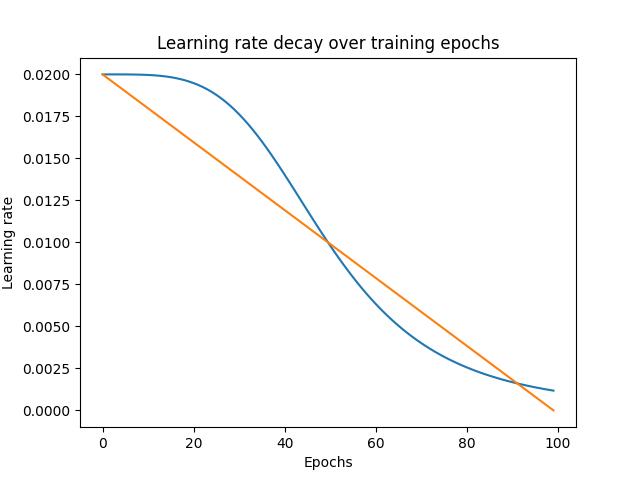

In [518]:
plt.figure()
alpha_start=0.02
n_epochs = 100
epoch_list = np.linspace(0, 1, n_epochs)
alphas_hill = alpha_start / (1 + (epoch_list / 0.5) ** 4)
alphas_linear = np.linspace(alpha_start, 0, n_epochs)
plt.plot(alphas_hill)
plt.plot(alphas_linear)
plt.xlabel("Epochs")
plt.ylabel("Learning rate")
plt.title("Learning rate decay over training epochs")
plt.show()

In [ ]:
n_neurons = np.arange(2,32,2)
sigmas = np.arange(0.01,0.16,0.01)
sigmas = [round(num, 2) for num in sigmas.tolist()]
n_epochs = 100
alpha = 0.02
alpha_decay = 'hill'
errors = np.zeros((len(n_neurons),len(sigmas)))
for n, n_neuron_per_dim in enumerate(n_neurons):
    for s, sigma_ratio in enumerate(sigmas):
        # Create population coding of the Iris data
        u_data = np.zeros(shape=X.shape+(n_neuron_per_dim,))
        for i in range(X.shape[0]):
            x = X[i,:]
            u_data[i,:,:] = gen_population_coding(x, x_min, x_max, n_neuron_per_dim, sigma_ratio)

        u_data_flat = u_data.reshape((u_data.shape[0], u_data.shape[1]*u_data.shape[2] ))
        print(u_data_flat)
        mlvq = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
        mlvq.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)
        errors[n,s] = mlvq.inf_errors[-1]

<IPython.core.display.Javascript object>


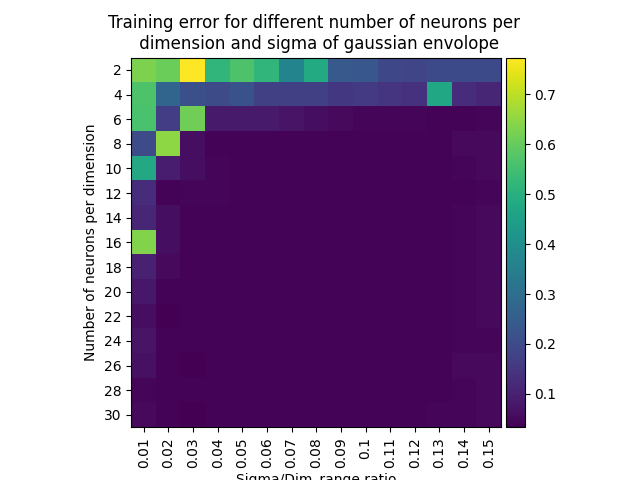

In [47]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure()
im=plt.imshow(errors)
ax = fig.axes[0]
plt.ylabel("Number of neurons per dimension")
plt.xlabel("Sigma/Dim_range ratio")

plt.xticks(np.arange(len(sigmas)),sigmas, rotation=90)
ax.set_yticks(np.arange(len(n_neurons)))
ax.set_yticklabels(n_neurons, fontsize=10)
# plt.xticks(sigmas)
# plt.yticks(n_neurons)
plt.title("Training error for different number of neurons per \n dimension and sigma of gaussian envolope")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.show()